## 6.2 Relationships

### This script contains the following:
1. Importing Visualization Libraries & Data
2. Data Cleaning
3. Exploring Relationships
4. Export Data Frame as Pkl

In [1316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn.preprocessing import LabelEncoder
import contextily as ctx
import folium
from folium.plugins import HeatMap

In [1317]:
# To ensure the charts are displayed in the notebook.
%matplotlib inline

In [1318]:
# Define path
path = r'/Users/rose/Documents/My Tableau Repository/Advance Analytics & Dashboard Design/'

In [1319]:
# Load data
df_listings_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'listings_clean.pkl'))

## 2. Data Cleaning

In [1320]:
# Check that dataframe is loaded with same shape as exported from 6.1
df_listings_clean.shape

(12197, 20)

In [1321]:
# Quick look at content
df_listings_clean.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,t,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,3,174,4.77,f,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,t,t,Kita Ku,35.73844,139.76917,Private room,1,1.0,3,249,4.98,f,53.0,Northern,Low Price,High Rating


#### Check for missing values, using df.isnull().sum()

In [1322]:
df_listings_clean.isnull().sum() 

id                        0
host_id                   0
host_response_time        0
host_response_rate        0
host_is_superhost         0
host_identity_verified    0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
beds                      0
minimum_nights            0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
price_usd                 0
region                    0
pricing_score             0
rating_score              0
dtype: int64

#### Find Duplicates

In [1323]:
# Find duplicates
df_dups = df_listings_clean[df_listings_clean.duplicated()]

In [1324]:
df_listings_clean.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,t,t,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,3,174,4.77,f,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,t,t,Kita Ku,35.73844,139.76917,Private room,1,1.0,3,249,4.98,f,53.0,Northern,Low Price,High Rating


#### No duplicates

In [1325]:
df_listings_clean.shape

(12197, 20)

#### Find Mixed-type

In [1326]:
for col in df_listings_clean.columns.tolist():
      weird = (df_listings_clean[[col]].map(type) != df_listings_clean[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_listings_clean[weird]) > 0:
        print (col)

No mixed-type columns

## 3. Exploring Relationships

#### Convert strings to boolean values and then to integers

In [1327]:
# 't' and 'f' are strings. Convert to boolean values
df_listings_clean['host_is_superhost'] = df_listings_clean['host_is_superhost'].map({'t': True, 'f': False})

In [1328]:
# Convert boolean values to integers to prepare for corrrelation mapping
df_listings_clean['host_is_superhost'] = df_listings_clean['host_is_superhost'].astype(int)

In [1329]:
# Frequency
df_listings_clean['host_is_superhost'].value_counts(dropna = False)

host_is_superhost
0    8285
1    3912
Name: count, dtype: int64

In [1330]:
# Convert 't' and 'f' strings to boolean values
df_listings_clean['host_identity_verified'] = df_listings_clean['host_identity_verified'].map({'t': True, 'f': False})

In [1331]:
# Convert boolean values to integers
df_listings_clean['host_identity_verified'] = df_listings_clean['host_identity_verified'].astype(int)

In [1332]:
# Frequency
df_listings_clean['host_identity_verified'].value_counts(dropna = False)

host_identity_verified
1    11911
0      286
Name: count, dtype: int64

In [1333]:
# Convert 't' and 'f' strings to boolean values
df_listings_clean['instant_bookable'] = df_listings_clean['instant_bookable'].map({'t': True, 'f': False})

In [1334]:
# Convert boolean values to integers
df_listings_clean['instant_bookable'] = df_listings_clean['instant_bookable'].astype(int)

In [1335]:
# Frequency
df_listings_clean['instant_bookable'].value_counts(dropna = False)

instant_bookable
1    9107
0    3090
Name: count, dtype: int64

In [1336]:
df_listings_clean.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,1,1,Sumida Ku,35.717070,139.826080,Entire home/apt,2,2.0,3,174,4.77,0,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,1,1,Kita Ku,35.738440,139.769170,Private room,1,1.0,3,249,4.98,0,53.0,Northern,Low Price,High Rating
2,905944,4847803,within an hour,97.0,1,1,Shibuya Ku,35.678780,139.678470,Entire home/apt,6,4.0,3,198,4.78,1,172.0,Central,Mid Price,High Rating
4,3838856,4626879,within an hour,100.0,1,1,Shibuya Ku,35.682450,139.690090,Entire home/apt,7,5.0,1,220,4.89,0,166.0,Central,Mid Price,High Rating
5,1196177,5686404,within an hour,100.0,0,1,Adachi Ku,35.744731,139.797384,Private room,4,2.0,2,108,4.75,0,37.0,Eastern,Low Price,High Rating


In [1337]:
df_listings_clean.describe()

,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd
count,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000
mean,99.231614,0.320735,0.976552,35.698703,139.743929,4.004017,2.408789,1.978273,37.007297,4.679268,0.746659,146.096499
std,4.627699,0.466778,0.151329,0.040925,0.056018,2.592544,1.684917,2.892907,61.828992,0.332247,0.434942,85.129864
min,0.000000,0.000000,0.000000,35.540630,139.575330,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,10.000000
25%,100.000000,0.000000,1.000000,35.688500,139.703556,2.000000,1.000000,1.000000,4.000000,4.600000,0.000000,83.000000
50%,100.000000,0.000000,1.000000,35.704044,139.732330,3.000000,2.000000,1.000000,15.000000,4.710000,1.000000,127.000000
75%,100.000000,1.000000,1.000000,35.722870,139.791208,5.000000,3.000000,2.000000,46.000000,4.880000,1.000000,191.000000
max,100.000000,1.000000,1.000000,35.807310,139.912548,16.000000,20.000000,29.000000,2258.000000,5.000000,1.000000,410.000000


#### Create a subset for correlation mapping

In [1338]:
# Create a subset of df_listings_clean to be used for correlation mapping
sub = df_listings_clean[['host_is_superhost', 'host_response_rate', 'host_identity_verified', 'instant_bookable', 'accommodates', 'beds','price_usd', 'minimum_nights', 'review_scores_rating', 'number_of_reviews']]

In [1339]:
# Create a correlation matrix using pandas
sub.corr()

,host_is_superhost,host_response_rate,host_identity_verified,instant_bookable,accommodates,beds,price_usd,minimum_nights,review_scores_rating,number_of_reviews
host_is_superhost,1.000000,0.076711,0.012455,-0.051667,0.018855,0.036157,0.080636,0.030117,0.296579,0.154538
host_response_rate,0.076711,1.000000,-0.003953,0.041620,0.030834,0.022926,0.022641,0.021629,0.067771,0.032876
host_identity_verified,0.012455,-0.003953,1.000000,0.091618,0.009854,0.011549,-0.019886,0.024683,-0.000471,0.008860
instant_bookable,-0.051667,0.041620,0.091618,1.000000,-0.017858,-0.045296,0.099319,-0.079771,-0.027024,-0.051097
accommodates,0.018855,0.030834,0.009854,-0.017858,1.000000,0.732634,0.611621,0.021964,0.039509,0.050666
beds,0.036157,0.022926,0.011549,-0.045296,0.732634,1.000000,0.461168,-0.005377,0.043171,0.064023
price_usd,0.080636,0.022641,-0.019886,0.099319,0.611621,0.461168,1.000000,-0.018283,0.088023,0.054341
minimum_nights,0.030117,0.021629,0.024683,-0.079771,0.021964,-0.005377,-0.018283,1.000000,0.033115,-0.054976
review_scores_rating,0.296579,0.067771,-0.000471,-0.027024,0.039509,0.043171,0.088023,0.033115,1.000000,0.080279
number_of_reviews,0.154538,0.032876,0.008860,-0.051097,0.050666,0.064023,0.054341,-0.054976,0.080279,1.000000


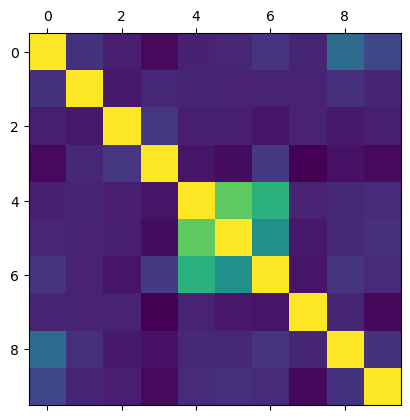

<Figure size 640x480 with 0 Axes>

In [1340]:
# Save figure
plt.matshow(sub.corr())
plt.show()
plt.savefig("out.png") 

In [1341]:
#current dir
cwd = os.getcwd()
cwd

'/Users/rose/Documents/My Tableau Repository/Advance Analytics & Dashboard Design/03 Scripts'

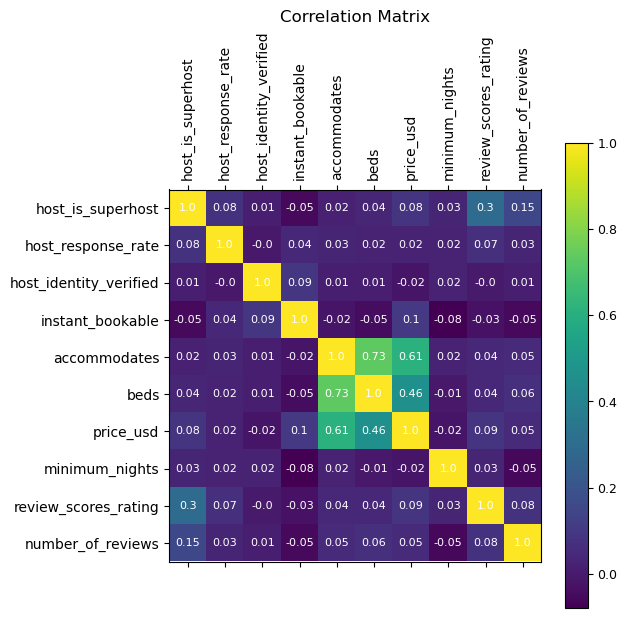

In [1342]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=9) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

# Add annotations
for i in range(sub.shape[1]):
    for j in range(sub.shape[1]):
        plt.text(j, i, round(sub.corr().iloc[i, j], 2), ha='center', va='center', color='white', fontsize=8)

plt.show()

Overall, the variables show relatively weak correlation, with most values approaching zero. There’s the notable exception of a stronger correlation between the number of beds and the property's accommodation capacity, which offers more of a practical correlation. Also moderate correlation between price and number of beds, also for 'price_usd' and 'accommodates'

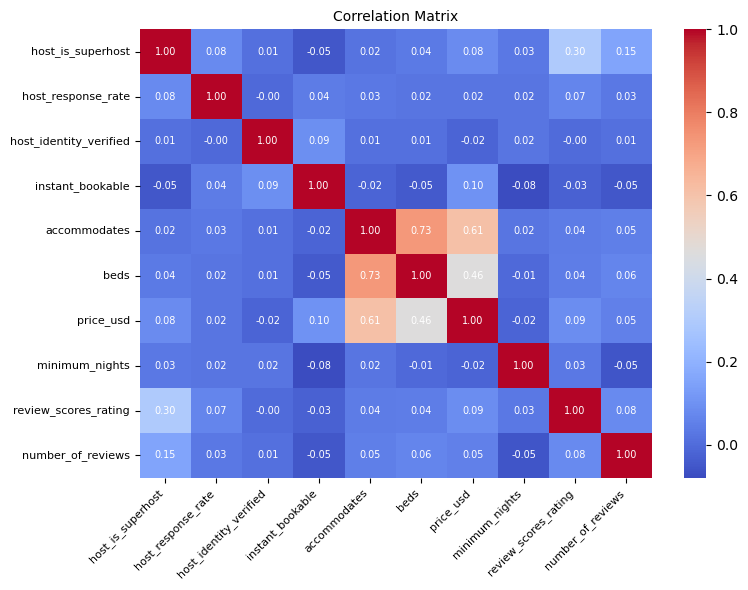

In [1343]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(8, 6))

# Create the correlation heatmap in seaborn without annotations
corr = sns.heatmap(sub.corr(), annot=False, ax=ax, cmap="coolwarm")

# Add custom labels to the heatmap
for i in range(sub.shape[1]):
    for j in range(sub.shape[1]):
        ax.text(j+0.5, i+0.5, '{:.2f}'.format(sub.corr().iloc[i, j]), 
                ha='center', va='center', color='white', fontsize=7)

# Set labels
ax.set_xticklabels(sub.columns, fontsize=8, rotation=45, ha='right')
ax.set_yticklabels(sub.columns, fontsize=8)

plt.title('Correlation Matrix', fontsize=10)  

# Adjust the layout
plt.tight_layout()  
plt.show()

#### Scatterplots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='beds', ylabel='Count'>

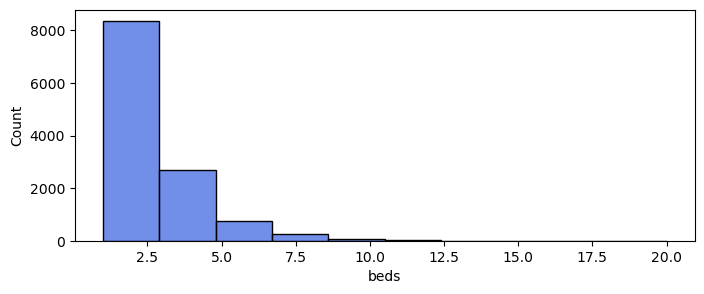

In [1344]:
# Create a histogram for 'beds'
plt.figure(figsize=(8, 3))
sns.histplot(sub['beds'], bins=10, color ='royalblue')

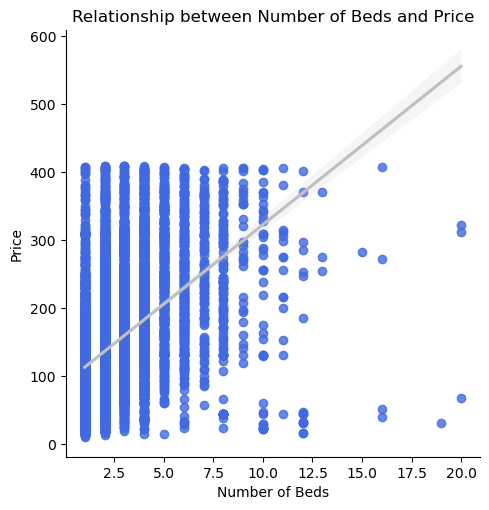

In [1345]:
# Create a scatterplot for the 'beds' and 'price' columns in seaborn

sns.lmplot(x='beds', y='price_usd', data=sub, scatter_kws={'color': 'royalblue'}, line_kws={'color': 'silver'})

# Labels & Titles
plt.title('Relationship between Number of Beds and Price')
plt.xlabel('Number of Beds')
plt.ylabel('Price')

plt.show()

Majority of the properties offer less than 10 beds.

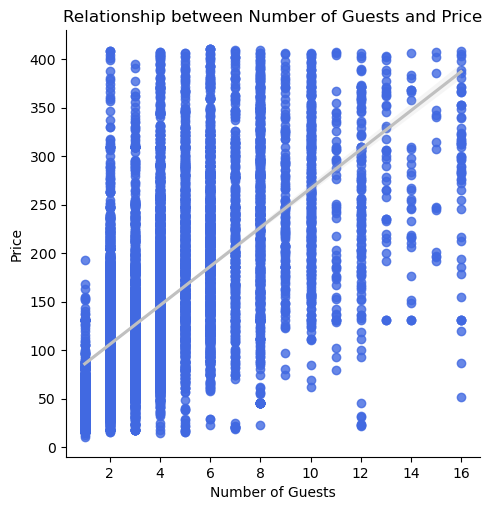

In [1346]:
# Create a scatterplot for the 'accommodates' and 'price_usd' columns in seaborn

sns.lmplot(x='accommodates', y='price_usd', data=sub, scatter_kws={'color': 'royalblue'}, line_kws={'color': 'silver'})

# Labels & Titles
plt.title('Relationship between Number of Guests and Price')
plt.xlabel('Number of Guests')
plt.ylabel('Price')

plt.show()

Number of people accomodated: The correlation coefficient is positive, and at 0.61, it indicates a moderate positive linear relationship between price and number of guests.

### Pair Plots

In [1347]:
# Create a subset with variables to use in the pair plot

sub_2 = sub[['accommodates', 'price_usd', 'review_scores_rating', 'number_of_reviews', 'host_response_rate']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

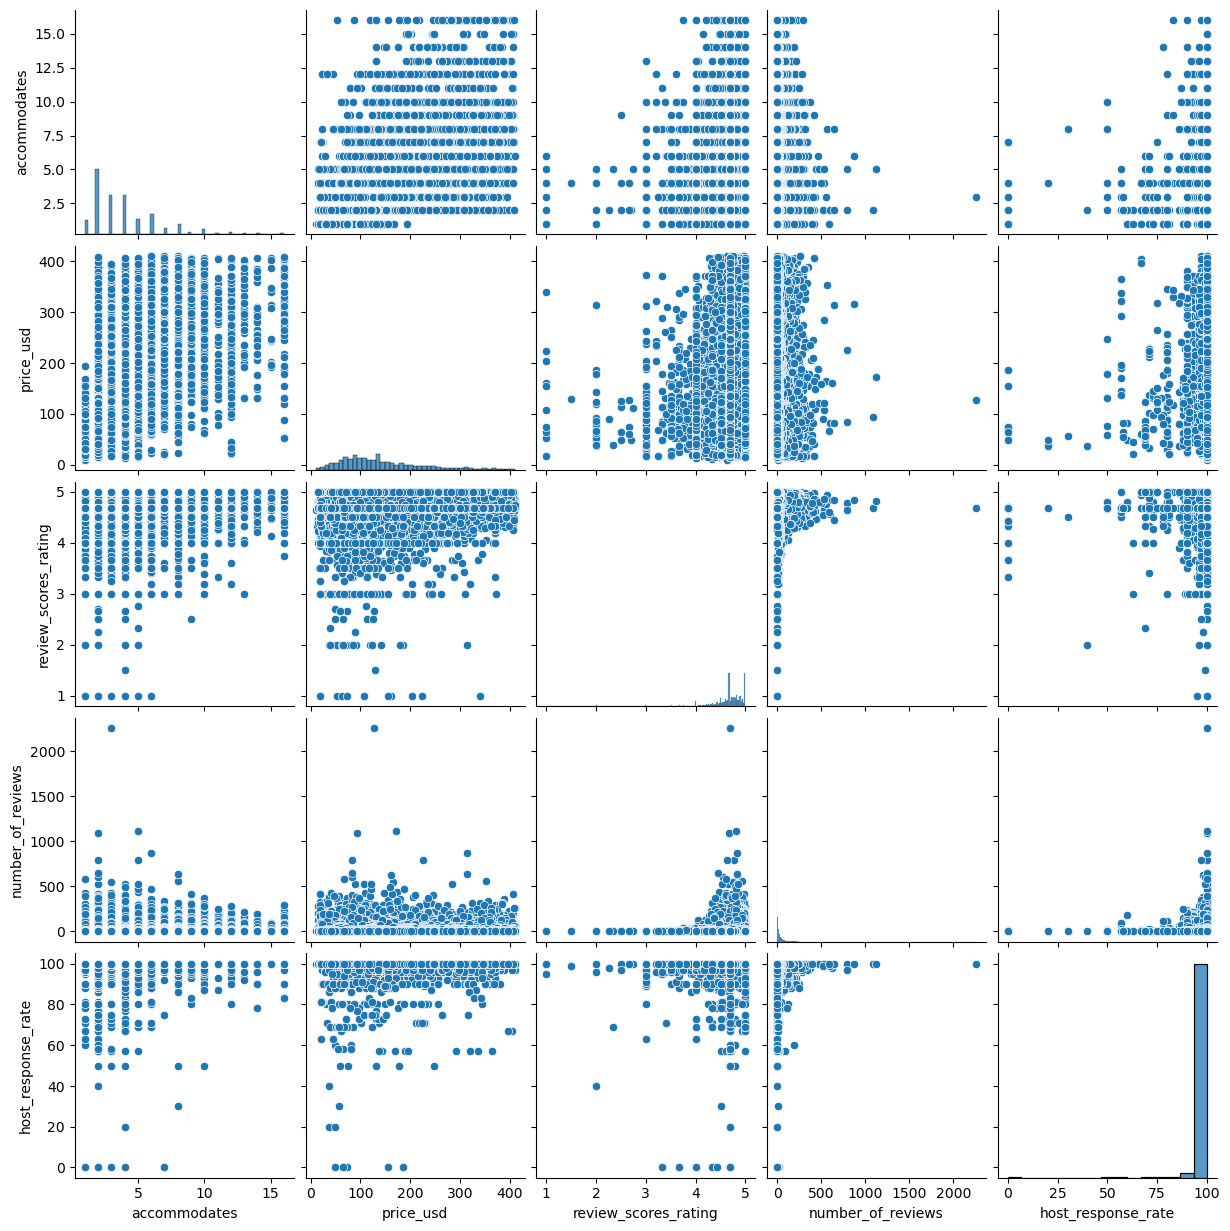

In [1348]:
# Create a pair plot 

g = sns.pairplot(sub_2)

Based on the scatterplot above, there appears to be a weak positive relationship between price and review scores: as price increases, the reviews tend to be more positive. Conversely, it seems that price may have an inverse relationship with the number of reviews: lower-priced listings tend to attract higher numbers of reviews.

### Categorical Plots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Prices in US dollars')

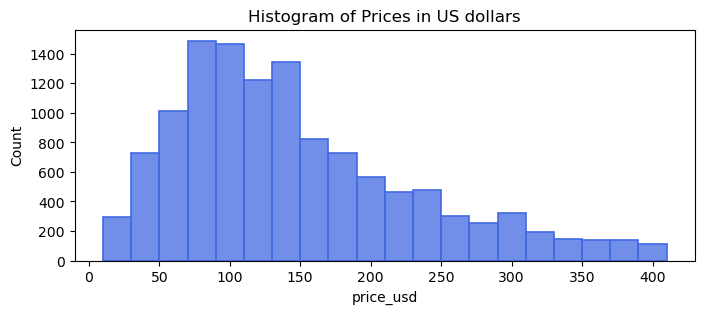

In [1349]:
# Create a histogram with seaborn
plt.figure(figsize=(8, 3))  
sns.histplot(df_listings_clean['price_usd'], bins=20, kde=False, color='royalblue', 
             edgecolor='royalblue', linewidth=1.2)

# Labels and title
plt.xlabel('price_usd')
plt.ylabel('Count')
plt.title('Histogram of Prices in US dollars')

In [1350]:
df_listings_clean.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,1,1,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,3,174,4.77,0,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,1,1,Kita Ku,35.73844,139.76917,Private room,1,1.0,3,249,4.98,0,53.0,Northern,Low Price,High Rating


In [1351]:
df_listings_clean.shape

(12197, 20)

In [1352]:
df_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12197 entries, 0 to 13724
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12197 non-null  object 
 1   host_id                 12197 non-null  object 
 2   host_response_time      12197 non-null  object 
 3   host_response_rate      12197 non-null  float64
 4   host_is_superhost       12197 non-null  int64  
 5   host_identity_verified  12197 non-null  int64  
 6   neighbourhood           12197 non-null  object 
 7   latitude                12197 non-null  float64
 8   longitude               12197 non-null  float64
 9   room_type               12197 non-null  object 
 10  accommodates            12197 non-null  int64  
 11  beds                    12197 non-null  float64
 12  minimum_nights          12197 non-null  int64  
 13  number_of_reviews       12197 non-null  int64  
 14  review_scores_rating    12197 non-null  flo

In [1353]:
# Calculate region counts
region_counts = df_listings_clean['region'].value_counts()

In [1354]:
unique_regions = df_listings_clean['region'].unique()

# Convert to a regular Python list and sort it
region_list = sorted(unique_regions.tolist())

print("All unique regions:")
for i, region in enumerate(region_list, 1):
    print(f"{i}. {region}")

print(f"\nTotal number of unique regions: {len(region_list)}")

All unique regions:
1. Central
2. Eastern
3. Northern
4. Southern
5. Western

Total number of unique regions: 5


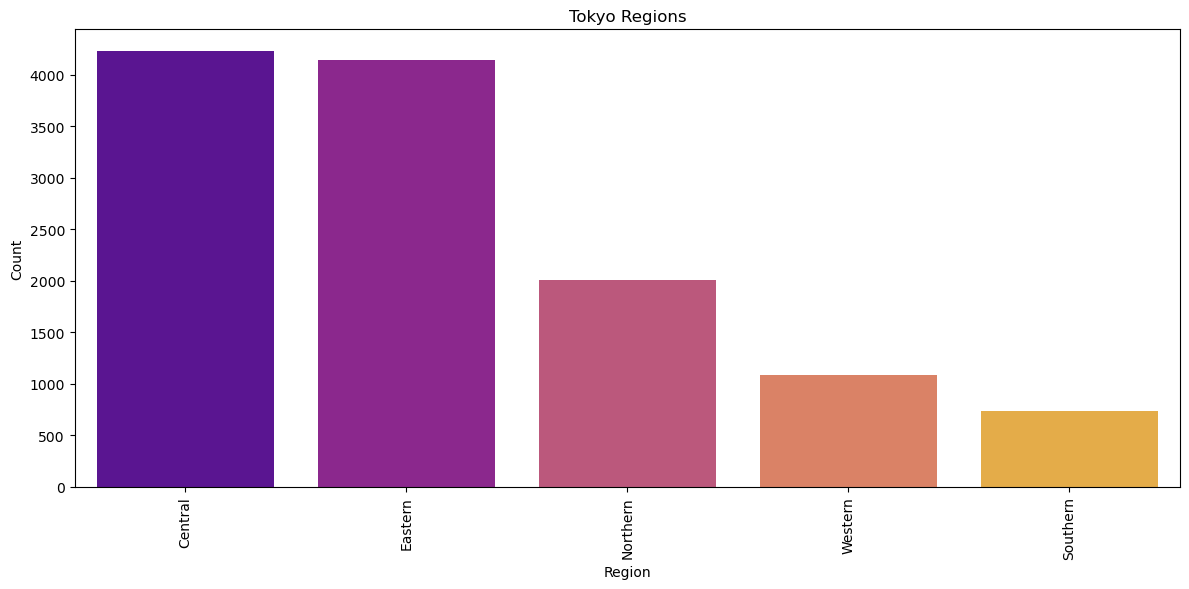

In [1355]:
# Create a bar plot
plt.figure(figsize=(12, 6))  # Increased figure size for better visibility
sns.barplot(x=region_counts.index, y=region_counts.values, palette="plasma")

plt.title('Tokyo Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [1356]:
df_listings_clean['neighbourhood'].value_counts().sort_values(ascending=False)

neighbourhood
Shinjuku Ku      2302
Taito Ku         1654
Sumida Ku        1541
Toshima Ku       1159
Shibuya Ku        784
Ota Ku            488
Minato Ku         473
Setagaya Ku       398
Nakano Ku         362
Kita Ku           358
Katsushika Ku     321
Chuo Ku           272
Suginami Ku       250
Koto Ku           249
Arakawa Ku        247
Bunkyo Ku         245
Itabashi Ku       242
Edogawa Ku        241
Shinagawa Ku      172
Chiyoda Ku        154
Adachi Ku         139
Nerima Ku          75
Meguro Ku          71
Name: count, dtype: int64

In [1357]:
unique_neighborhoods = df_listings_clean['neighbourhood'].unique()

# Convert to a regular Python list and sort it
neighborhood_list = sorted(unique_neighborhoods.tolist())

print("All unique neighborhoods:")
for i, neighborhood in enumerate(neighborhood_list, 1):
    print(f"{i}. {neighborhood}")

print(f"\nTotal number of unique neighborhoods: {len(neighborhood_list)}")

All unique neighborhoods:
1. Adachi Ku
2. Arakawa Ku
3. Bunkyo Ku
4. Chiyoda Ku
5. Chuo Ku
6. Edogawa Ku
7. Itabashi Ku
8. Katsushika Ku
9. Kita Ku
10. Koto Ku
11. Meguro Ku
12. Minato Ku
13. Nakano Ku
14. Nerima Ku
15. Ota Ku
16. Setagaya Ku
17. Shibuya Ku
18. Shinagawa Ku
19. Shinjuku Ku
20. Suginami Ku
21. Sumida Ku
22. Taito Ku
23. Toshima Ku

Total number of unique neighborhoods: 23


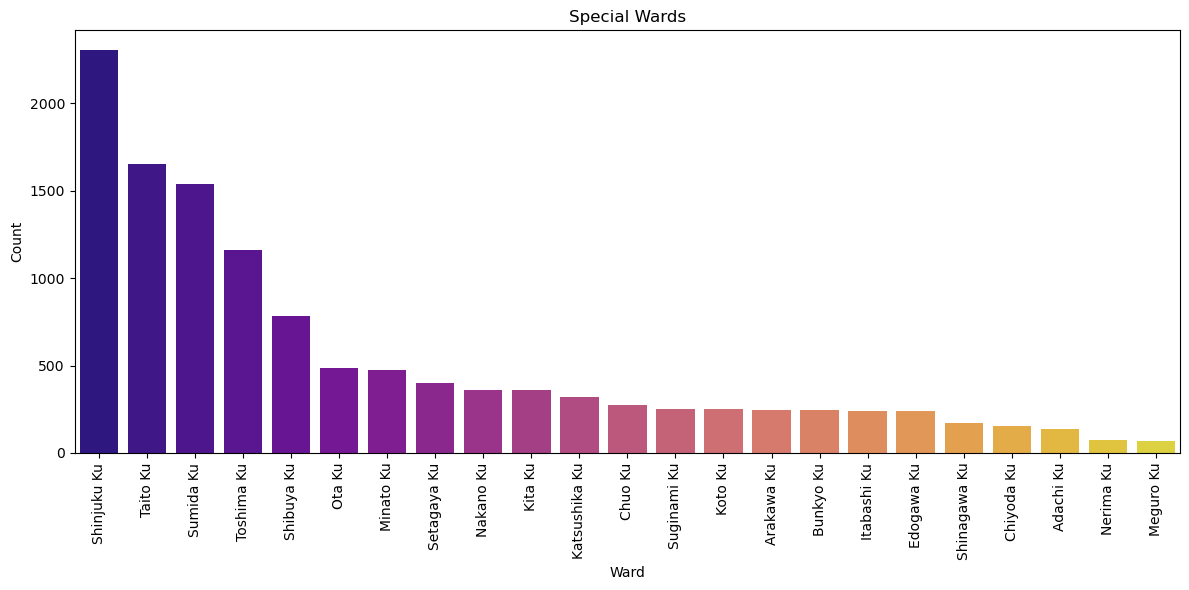

In [1358]:
# Count the occurrences of each neighborhood
neighborhood_counts = df_listings_clean['neighbourhood'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette="plasma")

plt.title('Special Wards')
plt.xlabel('Ward')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

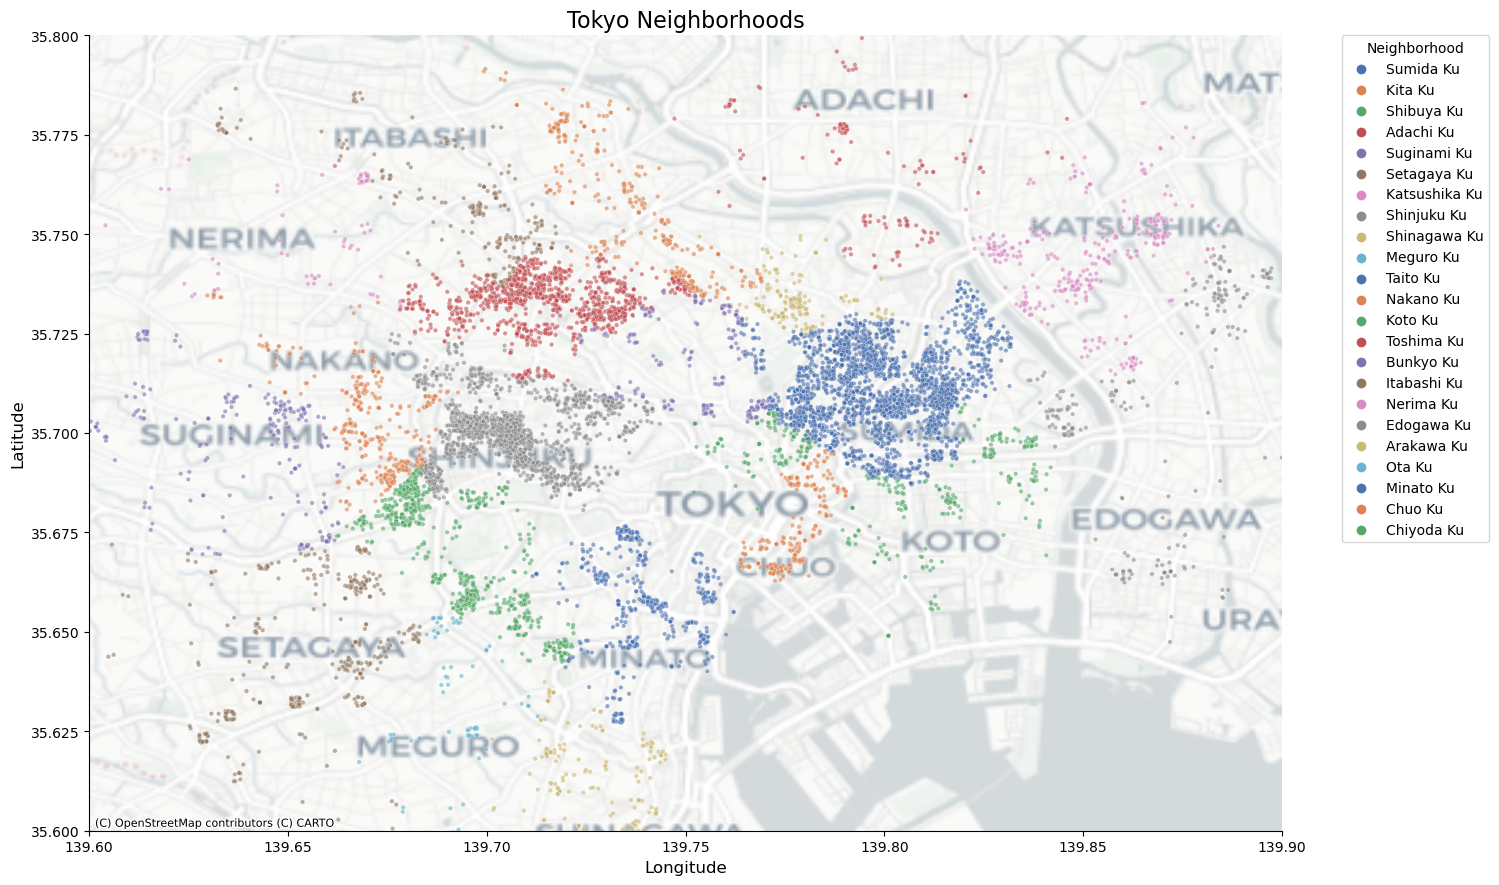

In [1359]:
plt.figure(figsize=(15, 10))

# Create the scatter plot
scatter = sns.scatterplot(
    data=df_listings_clean,
    x='longitude',
    y='latitude',
    hue='neighbourhood',
    alpha=0.6,
    s=10,  # Adjust point size
    palette='deep'
)

# Customize the plot
plt.title('Tokyo Neighborhoods', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust legend
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Add a basemap (requires contextily package)
ctx.add_basemap(scatter, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

# Set axis limit
plt.xlim(139.6, 139.9)  
plt.ylim(35.6, 35.8)    

plt.tight_layout()
plt.show()

In [1360]:
df_listings_clean.shape

(12197, 20)

## 4. Export as Pkl

In [1361]:
# Export df_listings_clean dataframe as “listings_explored.pkl” under “Prepared Data” folder.
df_listings_clean.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'listings_explored.pkl'))

## 5. Export as Pkl

In [1362]:
df_listings_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_explored.csv'))